## Project Background:

The Data Science field has experienced tremendous growth over the past decade. Companies across various industries, including technology, finance, healthcare, and retail, are increasingly leveraging data to make informed decisions. As a result, Data Professionals, who can turn raw data into actionable insights, have become one of the most in-demand professionals globally.

Within this expansive field, a myriad of titles and positions exist, reflecting a spectrum of responsibilities. Examples include Data Analysts, Data Scientists, Data Engineers, and Machine Learning Scientists. While this project does not intend to clarify the precise definitions of these roles, it aims to provide a comprehensive snapshot of the current Data Science job market, as seen through the job postings on Glassdoor.

Additionally, I hope that the findings of this project will not only assist me but also aid other job seekers in uncovering valuable insights for navigating the data science job market.

## Primary Objective:-

This project analyzes a dataset of Data Science job postings from Glassdoor to uncover key insights into the job market. The analysis uses various visualizations to explore aspects such as salary estimates, company sizes, and geographical distribution of job postings.

In [164]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fuzzywuzzy
from fuzzywuzzy import process
import  re
import geopandas as gpd

import plotly.express as px

In [165]:
data=pd.read_csv("Uncleaned_DS_jobs.csv")

In [167]:
data

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


In [166]:
df=data

In [3]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
df.dtypes

index                  int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [5]:
df.describe(include="all")

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
count,672.000000,672,672,672,672.000000,672,672,672,672,672.000000,672,672,672,672,672
unique,NaN,172,30,489,NaN,432,207,229,9,NaN,13,58,23,14,108
top,NaN,Data Scientist,$79K-$131K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,"San Francisco, CA","New York, NY",51 to 200 employees,NaN,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1
freq,NaN,337,32,12,NaN,12,69,33,135,NaN,397,71,188,213,501
mean,335.500000,NaN,NaN,NaN,3.518601,NaN,NaN,NaN,NaN,1635.529762,NaN,NaN,NaN,NaN,NaN
std,194.133974,NaN,NaN,NaN,1.410329,NaN,NaN,NaN,NaN,756.746640,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN
25%,167.750000,NaN,NaN,NaN,3.300000,NaN,NaN,NaN,NaN,1917.750000,NaN,NaN,NaN,NaN,NaN
50%,335.500000,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,1995.000000,NaN,NaN,NaN,NaN,NaN
75%,503.250000,NaN,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
df.index

RangeIndex(start=0, stop=672, step=1)

In [7]:
df.index.duplicated(keep='first').sum()

0

In [8]:
df[df.duplicated()]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors


In [9]:
df.isna().sum(axis=0)

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

We have checked that the data has a non-duplicate index list, and there are no missing values in the data set. Now, let's dive into each column and do some data cleaning.

In [10]:
df.shape

(672, 15)

# re arranging the column names

In [11]:
col=[col.strip().replace(" ","_").lower() for col in df.columns]

In [12]:
df.columns=col


In [13]:
df.columns

Index(['index', 'job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors'],
      dtype='object')

# Data Cleaning

1. job title column

In [14]:
df['job_title'].unique()

array(['Sr Data Scientist', 'Data Scientist',
       'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics',
       'Data Scientist - Statistics, Early Career', 'Data Modeler',
       'Experienced Data Scientist', 'Data Scientist - Contract',
       'Data Analyst II', 'Medical Lab Scientist',
       'Data Scientist/Machine Learning', 'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Senior Research Statistician- Data Scientist', 'Data Engineer',
       'Associate Data Scientist', 'Business Intelligence Analyst',
       'Senior Analyst/Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning',
       'Senior Data Scientist', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Data Analytics Engineer',
       'Product Data Scient

In [15]:
df['job_title'].nunique()

172

In [16]:
df['old title']= df['job_title']

In [17]:
# create a column to record weather a title has been integrated

df['integrated title']= pd.Series(np.zeros(len(df)),dtype=int)

In [18]:
df['integrated title']

0      0
1      0
2      0
3      0
4      0
      ..
667    0
668    0
669    0
670    0
671    0
Name: integrated title, Length: 672, dtype: int32

In [19]:
# remove white spaces change to lower cases

df['job_title']=df['job_title'].str.strip().str.lower()

#check the unique values of the title and their counts

title_counts=df['job_title'].value_counts()
print(title_counts)
print("."*80)
#get the count of different occurance frequencies

title_occurance_freq= title_counts.value_counts().sort_index().to_frame()
title_occurance_freq.columns=['count']
print(title_occurance_freq,'\n'*2)

print("."*80)
print(title_counts[title_counts>5])

print("."*80)
print('Title that have an occurace of at least 5 times over',(title_counts[title_counts>5].sum()/df.shape[0]*100),"% of raw data")


job_title
data scientist                                            337
data engineer                                              26
senior data scientist                                      19
machine learning engineer                                  16
data analyst                                               12
                                                         ... 
data science instructor                                     1
business data analyst                                       1
purification scientist                                      1
data engineer, enterprise analytics                         1
ai/ml - machine learning scientist, siri understanding      1
Name: count, Length: 172, dtype: int64
................................................................................
       count
count       
1         96
2         55
3         11
4          3
5          1
6          1
12         1
16         1
19         1
26         1
337        1 


................

The raw dataset contains 172 uniques titles; However,96 of these titles appearoly once,55 appears twice, and titles occuring at least five times compirse approximately 62% of our raw data. To ensure sufficient data for each title we analyze, we will retain only those titles that occur five times or more, and we will consolidate the remaining titles into these more frequently occurring categories.

To accomplish this, we will first assess the similarities between the titles that appear less than five times and those that appear at least five times. Based on this assessment, we will then group similar titles under a common title.

In [20]:
# Now we use the extract function from fuzzywuzzy to assess the title
# similarity, it allows you to input a title, and the algorithm will
# find the top n most similar titles each with a similar score.

In [21]:
title_show_up_5 = title_counts[title_counts>=5].index.to_list()

for i in title_show_up_5:
    print('these are the similar titles to ',i,"\n",
         fuzzywuzzy.process.extract(i,df['job_title'].unique(),limit=20,scorer=fuzzywuzzy.fuzz.token_sort_ratio ),"\n"*2)


these are the similar titles to  data scientist 
 [('data scientist', 100), ('sr data scientist', 90), ('(sr.) data scientist -', 90), ('ai data scientist', 90), ('sr. data scientist', 90), ('data scientist - risk', 85), ('lead data scientist', 85), ('data scientist 3 (718)', 82), ('staff data scientist', 82), ('sr. data scientist ii', 82), ('senior data scientist', 80), ('data scientist (ts/sci)', 80), ('ai ops data scientist', 80), ('data scientist - contract', 76), ('associate data scientist', 74), ('principal data scientist', 74), ('ngs scientist', 74), ('geospatial data scientist', 72), ('experienced data scientist', 70), ('human factors scientist', 70)] 


these are the similar titles to  data engineer 
 [('data engineer', 100), ('jr. data engineer', 90), ('big data engineer', 87), ('data engineer - kafka', 81), ('data engineer (remote)', 79), ('senior data engineer', 79), ('data analyst/engineer', 76), ('software data engineer', 74), ('data analytics engineer', 72), ('cloud data

In [22]:
# Start to integrate the titles that appear less than 5 times, which
# means we will only keep the titles below and integrate others into them.

titles_we_keep = title_show_up_5.copy()
titles_we_keep.append('data science manager')
titles_we_keep

['data scientist',
 'data engineer',
 'senior data scientist',
 'machine learning engineer',
 'data analyst',
 'senior data analyst',
 'senior data engineer',
 'data science manager']

In [23]:
df['integrated title'] = pd.Series(np.zeros(len(df)), dtype = int)

In [24]:
# Now we use a series of if-else check to consolidate the titles. To do that
# we start by naming some key words to identify certain titles.

senior = ['senior', 'sr', 'experienced', 'ii', 'iii', 'staff']
manager = ['manager', 'management', 'lead', 'principal', 'director','president', 'vp']

In [25]:
for i in range(0,len(df)):
    if df.loc[i,'job_title'] not in titles_we_keep:
        df.loc[i,'integrated title']=1
        title=df.loc[i,'job_title']
#         print(title)
        
        if any(key in title for key in manager):
            df.loc[i,'job_title']='data science manager'
        elif 'machine learning' in title:
            df.loc[i,'job_title']= 'machine learning engineer'
        
        elif any(key in title for key in senior):
            if 'engineer' in title:
                df.loc[i, 'job_title'] = 'senior data engineer'
            elif 'analyst' in title:
                df.loc[i, 'job_title'] = 'senior data analyst'
            elif 'scientist' in title:
                df.loc[i, 'job_title'] = 'senior data scientist'
                

        elif 'engineer' in title:
            df.loc[i, 'job_title'] = 'data engineer'
        elif 'analyst' in title:
            df.loc[i, 'job_title'] = 'data analyst'
        elif 'scientist' in title:
            df.loc[i, 'job_title'] = 'data scientist'

In [26]:
df['job_title'].unique()

array(['senior data scientist', 'data scientist',
       'machine learning engineer', 'data modeler', 'senior data analyst',
       'data analyst', 'data engineer', 'data science manager',
       'senior data engineer', 'data science instructor',
       'data modeler (analytical systems)', 'environmental data science',
       'it partner digital health technology and data science',
       'data architect', 'developer iii - data science'], dtype=object)

In [27]:
df['job_title']=df['job_title'].replace({"it partner digital health technology and data science":"data scientist",'environmental data science':"data scientist"})

In [28]:
df['job_title'].nunique()

13

We observe that the conditional checks have effectively managed most of the titles that appear only once or twice, and we further refined the integration manually for the unusual cases. Ultimately, we consolidated all the titles into the 8 common categories we have chosen. For those who wish to validate the process, the following code provides a comparison between the original titles and the integrated ones.

In [29]:
df['integrated title'].value_counts()

integrated title
0    422
1    250
Name: count, dtype: int64

In [30]:
df[df['integrated title']==1]['job_title'].unique()

array(['senior data scientist', 'machine learning engineer',
       'data scientist', 'data modeler', 'senior data analyst',
       'data analyst', 'data engineer', 'data science manager',
       'senior data engineer', 'data science instructor',
       'data modeler (analytical systems)', 'data architect',
       'developer iii - data science'], dtype=object)

In [31]:
df[df['integrated title']==0]['job_title'].unique()

array(['data scientist', 'data engineer', 'data analyst',
       'machine learning engineer', 'senior data scientist',
       'senior data engineer', 'senior data analyst',
       'data science manager'], dtype=object)

## 2. Salary Estimation column

In [32]:
df['salary_estimate'].dtypes


dtype('O')

The 'Salary Estimation' column is an object column not a numerical, but consits of lower and upper limits estimates provided by Glassdoor or emplyers. For analysis it is necessary to convert into integer.

In [33]:
col=[col.replace("$","").replace("K","").replace("(Glassdoor est.)","").strip() for col in df['salary_estimate']]
# print(col)

In [34]:
info=df.salary_estimate.str.replace(r'[^\d-]','',regex=True).str.split('-')

df['salary_lower']= [int(val[0]) for val in info]

df['salary_upper']= list(map(lambda x:int(x[1]),info))

df['salary']= (df.salary_lower.astype(int) + (df.salary_upper.astype(int)) /2)

In [35]:
df['salary'].head()

0    222.5
1    222.5
2    222.5
3    222.5
4    222.5
Name: salary, dtype: float64

In [36]:
df

,index,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,old title,integrated title,salary_lower,salary_upper,salary
0,0,senior data scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",Sr Data Scientist,1,137,171,222.5
1,1,data scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,Data Scientist,0,137,171,222.5
2,2,data scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,Data Scientist,0,137,171,222.5
3,3,data scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",Data Scientist,0,137,171,222.5
4,4,data scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,0,137,171,222.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,data scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1,Data Scientist,0,105,167,188.5
668,668,data scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1,Data Scientist,0,105,167,188.5
669,669,data scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1,Data Scientist,0,105,167,188.5
670,670,data scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1,Data Scientist,0,105,167,188.5


## Rating Column

In [37]:
df['rating'].unique()

array([ 3.1,  4.2,  3.8,  3.5,  2.9,  3.9,  4.4,  3.6,  4.5,  4.7,  3.7,
        3.4,  4.1,  3.2,  4.3,  2.8,  5. ,  4.8,  3.3,  2.7,  2.2,  2.6,
        4. ,  2.5,  4.9,  2.4, -1. ,  2.3,  4.6,  3. ,  2.1,  2. ])

In [38]:
df['rating'].value_counts()

rating
 3.5    58
-1.0    50
 4.0    41
 3.3    41
 3.9    40
 3.8    39
 3.7    38
 5.0    36
 4.5    32
 3.6    31
 3.4    31
 4.2    29
 4.1    25
 4.4    24
 4.7    22
 3.2    21
 4.8    20
 4.3    14
 2.9    14
 4.6    12
 3.1    12
 4.9    11
 2.7    10
 3.0     7
 2.6     4
 2.8     3
 2.5     2
 2.2     1
 2.4     1
 2.3     1
 2.1     1
 2.0     1
Name: count, dtype: int64

One thing needs attention for the 'Rating' column is that there are 50 negative values. It is possible that they are actualy missing values. In order to confirm my thought, I went to Glassdoor.com and searched some companies that have a -1 rating in this data set, and indeed all of them do not have a rating because few number of reviews. So we can replace all the -1 in the Rating column to NaN.

In [39]:
print(df.rating.describe())
print('There are',sum(df.rating==-1),'"-1" in the rating column')
df.loc[df.rating==-1,'rating']=np.nan

count    672.000000
mean       3.518601
std        1.410329
min       -1.000000
25%        3.300000
50%        3.800000
75%        4.300000
max        5.000000
Name: rating, dtype: float64
There are 50 "-1" in the rating column


In [40]:
df.rating.describe()

count    622.000000
mean       3.881833
std        0.610805
min        2.000000
25%        3.500000
50%        3.800000
75%        4.400000
max        5.000000
Name: rating, dtype: float64

4. company name column

In [41]:
df.company_name.unique()

array(['Healthfirst\n3.1', 'ManTech\n4.2', 'Analysis Group\n3.8',
       'INFICON\n3.5', 'Affinity Solutions\n2.9', 'HG Insights\n4.2',
       'Novartis\n3.9', 'iRobot\n3.5', 'Intuit - Data\n4.4',
       'XSELL Technologies\n3.6', 'Novetta\n4.5', '1904labs\n4.7',
       'PNNL\n3.7', 'Old World Industries\n3.1',
       'Mathematica Policy Research\n3.4',
       'Guzman & Griffin Technologies (GGTI)\n4.4',
       'Upside Business Travel\n4.1', 'Buckman\n3.5',
       'Insight Enterprises, Inc.\n4.2', 'Tower Health\n3.5',
       'Triplebyte\n3.2', 'PulsePoint\n4.3', 'Exponent\n3.5',
       'Guardian Life\n3.5',
       'Spectrum Communications and Consulting\n3.4',
       'Oversight Systems\n4.7', 'LSQ\n4.2',
       'MIT Lincoln Laboratory\n3.8', 'Kingfisher Systems\n4.5',
       'Formation\n2.8', 'Cohere Health\n5.0', 'Acuity Insurance\n4.8',
       'Chef\n3.6', 'Puget Sound Energy\n3.3', 'Sandhills Global\n2.7',
       'A Place for Mom\n2.7', 'Great-Circle Technologies\n2.2',
       'Edmu

For the company name column, the biggest problem we have notied that each name comes with rating ,which is already recorded in another column. so, we need to get rid of the unnessary posfi

In [42]:
df.company_name=df.company_name.str.split('\n').str[0]

In [43]:
df.company_name

0               Healthfirst
1                   ManTech
2            Analysis Group
3                   INFICON
4        Affinity Solutions
               ...         
667                TRANZACT
668                    JKGT
669              AccessHope
670    ChaTeck Incorporated
671           1-800-Flowers
Name: company_name, Length: 672, dtype: object

5.Location columns

In [44]:
df['location'].str.split(',')

0           [New York,  NY]
1          [Chantilly,  VA]
2             [Boston,  MA]
3             [Newton,  MA]
4           [New York,  NY]
               ...         
667         [Fort Lee,  NJ]
668    [San Francisco,  CA]
669        [Irwindale,  CA]
670    [San Francisco,  CA]
671         [New York,  NY]
Name: location, Length: 672, dtype: object

In [45]:
df.location.unique()

array(['New York, NY', 'Chantilly, VA', 'Boston, MA', 'Newton, MA',
       'Santa Barbara, CA', 'Cambridge, MA', 'Bedford, MA',
       'San Diego, CA', 'Chicago, IL', 'Herndon, VA', 'Saint Louis, MO',
       'Richland, WA', 'Northbrook, IL', 'Washington, DC', 'Remote',
       'Memphis, TN', 'Plano, TX', 'West Grove, PA', 'Phoenix, AZ',
       'Appleton, WI', 'Atlanta, GA', 'Orlando, FL', 'Lexington, MA',
       'McLean, VA', 'San Francisco, CA', 'Sheboygan, WI',
       'United States', 'Bothell, WA', 'Lincoln, NE', 'Overland Park, KS',
       'Santa Monica, CA', 'Portsmouth, NH', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Bellevue, WA',
       'New Orleans, LA', 'Akron, OH', 'Fort Wayne, IN', 'Woburn, MA',
       'Carson, CA', 'Coral Gables, FL', 'Santa Clara, CA',
       'Brisbane, CA', 'Winter Park, FL', 'Redwood City, CA',
       'Peoria, IL', 'Ipswich, MA', 'Carmel, IN', 'Emeryville, CA',
       'Gaithersburg, MD', 'Longmont, CO', 'Austin, TX', 'Yakima, WA',
 

In [46]:
# create lists to identify the states and country name
US = ['United States', 'USA', 'united states', 'U.S.']
DC = ['Washington, D.C.', 'Washington, DC']

# Map of full state names to their abbreviations
state_name_to_abbreviation = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [47]:
# state_name_to_abbreviation

In [48]:
states=list(state_name_to_abbreviation.keys())
state_abbrs=list(state_name_to_abbreviation.values())
states.extend(state_abbrs)

In [49]:
df['location'].apply(lambda x:x.split(',')[-1])

0       NY
1       VA
2       MA
3       MA
4       NY
      ... 
667     NJ
668     CA
669     CA
670     CA
671     NY
Name: location, Length: 672, dtype: object

In [50]:
df['location'].str.split(',')

0           [New York,  NY]
1          [Chantilly,  VA]
2             [Boston,  MA]
3             [Newton,  MA]
4           [New York,  NY]
               ...         
667         [Fort Lee,  NJ]
668    [San Francisco,  CA]
669        [Irwindale,  CA]
670    [San Francisco,  CA]
671         [New York,  NY]
Name: location, Length: 672, dtype: object

In [51]:
df[['City', 'State','none']] = df['location'].str.split(', ', expand=True)

In [52]:
df=df.drop(['location','none'],axis=1)

In [53]:
df['size'].unique()

array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees', '-1', 'Unknown'],
      dtype=object)

In [54]:
len(df[df['size']=='-1'])

27

In [55]:
df.loc[df['size']=='-1','size']='unknown'

In [56]:
# val

In [57]:
df['max_emp_size']=[val.split("to")[-1].split("employees")[0].replace("+","").strip() for val in df['size']]

In [58]:
df['max_emp_size']

0         5000
1        10000
2         5000
3         1000
4          200
        ...   
667       5000
668    unknown
669    unknown
670         50
671       5000
Name: max_emp_size, Length: 672, dtype: object

In [59]:
df['min_emp_size']=[val.split("to")[0].replace('+ employees',"").strip() for val in df['size']]

### Type of ownweship columns

In [60]:
df['type_of_ownership'].unique()

array(['Nonprofit Organization', 'Company - Public',
       'Private Practice / Firm', 'Company - Private', 'Government',
       'Subsidiary or Business Segment', 'Other Organization', '-1',
       'Unknown', 'Hospital', 'Self-employed', 'College / University',
       'Contract'], dtype=object)

In [61]:
df['company_name']=df['company_name'].apply(lambda x:x.split('\n')[0])

In [62]:
df['company_name']

0               Healthfirst
1                   ManTech
2            Analysis Group
3                   INFICON
4        Affinity Solutions
               ...         
667                TRANZACT
668                    JKGT
669              AccessHope
670    ChaTeck Incorporated
671           1-800-Flowers
Name: company_name, Length: 672, dtype: object

In [63]:
df.sort_values(by='rating',ascending=True)

,index,job_title,salary_estimate,job_description,rating,company_name,headquarters,size,founded,type_of_ownership,...,competitors,old title,integrated title,salary_lower,salary_upper,salary,City,State,max_emp_size,min_emp_size
579,579,data engineer,$138K-$158K (Glassdoor est.),*Our company:\n*Conagen Inc. is a leader in cu...,2.0,Conagen,"Bedford, MA",51 to 200 employees,-1,Company - Private,...,-1,Scientist/Research Associate-Metabolic Enginee...,1,138,158,217.0,New Bedford,MA,200,51
444,444,data scientist,$79K-$133K (Glassdoor est.),About Hive\n\nHive is a full-stack deep learni...,2.1,Hive (CA),"Los Angeles, CA",Unknown,2019,Company - Private,...,-1,Data Scientist,0,79,133,145.5,San Francisco,CA,Unknown,Unknown
38,38,data scientist,$75K-$131K (Glassdoor est.),Job Title: Data Scientists\n\nJob Description\...,2.2,Great-Circle Technologies,"Chantilly, VA",1 to 50 employees,2000,Company - Private,...,-1,Data Scientist,0,75,131,140.5,Chantilly,VA,50,1
169,169,senior data analyst,$101K-$165K (Glassdoor est.),"Position location: Lake Mary, FLorBlue Bell, P...",2.3,United BioSource,"Blue Bell, PA",1001 to 5000 employees,2003,Other Organization,...,"Covance, ICON",Sr Data Analyst,1,101,165,183.5,Blue Bell,PA,5000,1001
147,147,data scientist,$90K-$109K (Glassdoor est.),"Crown Bioscience, a JSR Life Sciences company,...",2.4,Crown Bioscience,"San Diego, CA",501 to 1000 employees,2006,Company - Private,...,-1,Scientist - Biomarker and Flow Cytometry,1,90,109,144.5,San Diego,CA,1000,501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,657,data scientist,$105K-$167K (Glassdoor est.),"Overview\n\nGood people, working with good peo...",NaN,Kehe Food Distributors,-1,unknown,-1,-1,...,-1,Data Scientist,0,105,167,188.5,Naperville,IL,unknown,unknown
660,660,data scientist,$105K-$167K (Glassdoor est.),"Location: Redmond, WA\nClient: Microsoft (Un-M...",NaN,Pactera Edge,-1,unknown,-1,-1,...,-1,Data Scientist,0,105,167,188.5,Redmond,WA,unknown,unknown
664,664,data scientist,$105K-$167K (Glassdoor est.),Job Description\nClear Ridge has an exciting o...,NaN,Clear Ridge Defense,"Baltimore, MD",1 to 50 employees,-1,Company - Private,...,-1,Data Scientist,0,105,167,188.5,Quantico,VA,50,1
668,668,data scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,NaN,JKGT,-1,unknown,-1,-1,...,-1,Data Scientist,0,105,167,188.5,San Francisco,CA,unknown,unknown


In [64]:
df.columns

Index(['index', 'job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'headquarters', 'size', 'founded', 'type_of_ownership',
       'industry', 'sector', 'revenue', 'competitors', 'old title',
       'integrated title', 'salary_lower', 'salary_upper', 'salary', 'City',
       'State', 'max_emp_size', 'min_emp_size'],
      dtype='object')

In [65]:
df['founded']-2021

0       -28
1       -53
2       -40
3       -21
4       -23
       ... 
667     -32
668   -2022
669   -2022
670   -2022
671     -45
Name: founded, Length: 672, dtype: int64

In [66]:
df['founded'].value_counts()

founded
-1       118
 2012     34
 2011     25
 2015     22
 2010     22
        ... 
 1820      1
 1952      1
 1959      1
 1894      1
 1962      1
Name: count, Length: 103, dtype: int64

In [67]:
df['company_age']=df.founded.apply(lambda x:1 if x<1 else 2021-x)

In [68]:
# df[df['company_age']== -1].shape

In [69]:
df.rating= np.where(df.rating == -1.0,0,df.rating)

In [70]:
df['python']=df['job_description'].apply(lambda x:1 if 'python' in x.lower() else 0)
df['excel']=df['job_description'].apply(lambda x:1 if 'excel' in x.lower() else 0)
df['hadoop']=df['job_description'].apply(lambda x:1 if 'hadoop' in x.lower() else 0)
df['spark']=df['job_description'].apply(lambda x:1 if 'spark' in x.lower() else 0)
df['aws']=df['job_description'].apply(lambda x:1 if 'aws' in x.lower() else 0)
df['tableau']=df['job_description'].apply(lambda x:1 if 'tableau' in x.lower() else 0)
df['big_data']=df['job_description'].apply(lambda x:1 if 'big_data' in x.lower() else 0)
df['numpy']=df['job_description'].apply(lambda x:1 if 'numpy' in x.lower() else 0)
df['pandas']=df['job_description'].apply(lambda x:1 if 'pandas' in x.lower() else 0)
df['machine_learning']=df['job_description'].apply(lambda x:1 if 'machine learning' in x.lower() else 0)
df['power_bi']=df['job_description'].apply(lambda x:1 if 'power bi' in x.lower() else 0)
df['sql']=df['job_description'].apply(lambda x:1 if 'sql' in x.lower() else 0)
df['deep_learning']=df['job_description'].apply(lambda x:1 if 'deep learning' in x.lower() else 0)

In [71]:
a=df['job_description'].apply(lambda x:1 if 'sql' in x.lower() else 0)

In [72]:
col=df['job_description'].apply(lambda x:1 if 'deep learning' in x.lower() else 0)

In [73]:
a.value_counts()

job_description
1    356
0    316
Name: count, dtype: int64

In [74]:
df['job_title'].value_counts()

job_title
data scientist                       414
data engineer                         63
senior data scientist                 51
machine learning engineer             45
data analyst                          35
data science manager                  30
senior data analyst                   20
senior data engineer                   7
data modeler (analytical systems)      3
data modeler                           1
data science instructor                1
data architect                         1
developer iii - data science           1
Name: count, dtype: int64

In [75]:
df['type_of_ownership'].unique()

array(['Nonprofit Organization', 'Company - Public',
       'Private Practice / Firm', 'Company - Private', 'Government',
       'Subsidiary or Business Segment', 'Other Organization', '-1',
       'Unknown', 'Hospital', 'Self-employed', 'College / University',
       'Contract'], dtype=object)

In [76]:
df['type_of_ownership'].value_counts()

type_of_ownership
Company - Private                 397
Company - Public                  153
Nonprofit Organization             36
Subsidiary or Business Segment     28
-1                                 27
Government                         10
Other Organization                  5
Private Practice / Firm             4
Unknown                             4
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: count, dtype: int64

In [77]:
df.loc[df.type_of_ownership=='Unknown']

,index,job_title,salary_estimate,job_description,rating,company_name,headquarters,size,founded,type_of_ownership,...,spark,aws,tableau,big_data,numpy,pandas,machine_learning,power_bi,sql,deep_learning
258,258,data scientist,$90K-$124K (Glassdoor est.),Full Time Data Scientist\n\nThe Drive Media is...,5.0,"The Drive Media, Inc.",-1,Unknown,-1,Unknown,...,0,0,0,0,0,0,1,0,1,0
409,409,data scientist,$124K-$198K (Glassdoor est.),About Navio:\nNavio builds software tools that...,NaN,Navio,"Half Moon Bay, CA",Unknown,-1,Unknown,...,0,1,0,0,0,0,0,0,0,0
504,504,data scientist,$95K-$119K (Glassdoor est.),Job Description\nWorking at Sophinea\n\nSophin...,NaN,Sophinea,-1,1 to 50 employees,-1,Unknown,...,0,0,0,0,0,0,0,0,1,0
637,637,data scientist,$92K-$155K (Glassdoor est.),Job Description\nWorking at Sophinea\n\nSophin...,NaN,Sophinea,-1,1 to 50 employees,-1,Unknown,...,0,0,0,0,0,0,0,0,1,0


In [78]:
df.industry=np.where(df.industry=='-1','Unknown',df.industry)

In [79]:
df['industry'].dtype

dtype('O')

In [80]:
df['industry'].value_counts()

industry
Unknown                                     71
Biotech & Pharmaceuticals                   66
IT Services                                 61
Computer Hardware & Software                57
Aerospace & Defense                         46
Enterprise Software & Network Solutions     43
Consulting                                  38
Staffing & Outsourcing                      36
Insurance Carriers                          28
Internet                                    27
Advertising & Marketing                     23
Health Care Services & Hospitals            21
Research & Development                      17
Federal Agencies                            16
Investment Banking & Asset Management       13
Banks & Credit Unions                        8
Lending                                      8
Energy                                       5
Consumer Products Manufacturing              5
Telecommunications Services                  5
Insurance Agencies & Brokerages              4
Food

In [81]:
df[df['headquarters']=='-1']

,index,job_title,salary_estimate,job_description,rating,company_name,headquarters,size,founded,type_of_ownership,...,spark,aws,tableau,big_data,numpy,pandas,machine_learning,power_bi,sql,deep_learning
154,154,data scientist,$90K-$109K (Glassdoor est.),"Covaxx, a subsidiary of the UBI Group, has joi...",NaN,Covid-19 Search Partners,-1,unknown,-1,-1,...,0,0,0,0,0,0,0,0,0,0
158,158,machine learning engineer,$101K-$165K (Glassdoor est.),Overview\n\nRadical Convergence is a fast-pace...,NaN,Radical Convergence,-1,unknown,-1,-1,...,0,0,0,0,0,0,1,0,0,1
258,258,data scientist,$90K-$124K (Glassdoor est.),Full Time Data Scientist\n\nThe Drive Media is...,5.0,"The Drive Media, Inc.",-1,Unknown,-1,Unknown,...,0,0,0,0,0,0,1,0,1,0
351,351,data scientist,$122K-$146K (Glassdoor est.),About Our AI/ML Team\n\nOur mission is to buil...,NaN,Point72 Ventures,-1,unknown,-1,-1,...,0,0,0,0,0,0,1,0,0,0
357,357,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,-1,unknown,-1,-1,...,1,1,0,0,0,0,1,0,0,0
358,358,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,-1,unknown,-1,-1,...,1,1,0,0,0,0,1,0,0,0
359,359,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,-1,unknown,-1,-1,...,1,1,0,0,0,0,1,0,0,0
360,360,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,-1,unknown,-1,-1,...,1,1,0,0,0,0,1,0,0,0
361,361,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,-1,unknown,-1,-1,...,1,1,0,0,0,0,1,0,0,0
362,362,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,-1,unknown,-1,-1,...,1,1,0,0,0,0,1,0,0,0


In [82]:
df[df['type_of_ownership']=='-1']

,index,job_title,salary_estimate,job_description,rating,company_name,headquarters,size,founded,type_of_ownership,...,spark,aws,tableau,big_data,numpy,pandas,machine_learning,power_bi,sql,deep_learning
154,154,data scientist,$90K-$109K (Glassdoor est.),"Covaxx, a subsidiary of the UBI Group, has joi...",NaN,Covid-19 Search Partners,-1,unknown,-1,-1,...,0,0,0,0,0,0,0,0,0,0
158,158,machine learning engineer,$101K-$165K (Glassdoor est.),Overview\n\nRadical Convergence is a fast-pace...,NaN,Radical Convergence,-1,unknown,-1,-1,...,0,0,0,0,0,0,1,0,0,1
351,351,data scientist,$122K-$146K (Glassdoor est.),About Our AI/ML Team\n\nOur mission is to buil...,NaN,Point72 Ventures,-1,unknown,-1,-1,...,0,0,0,0,0,0,1,0,0,0
357,357,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,-1,unknown,-1,-1,...,1,1,0,0,0,0,1,0,0,0
358,358,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,-1,unknown,-1,-1,...,1,1,0,0,0,0,1,0,0,0
359,359,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,-1,unknown,-1,-1,...,1,1,0,0,0,0,1,0,0,0
360,360,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,-1,unknown,-1,-1,...,1,1,0,0,0,0,1,0,0,0
361,361,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,-1,unknown,-1,-1,...,1,1,0,0,0,0,1,0,0,0
362,362,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,-1,unknown,-1,-1,...,1,1,0,0,0,0,1,0,0,0
388,388,data scientist,$110K-$163K (Glassdoor est.),"Job Description\nAs a Data Scientist, you will...",NaN,HireAi,-1,unknown,-1,-1,...,1,0,1,0,0,0,1,0,1,0


In [83]:
df[df['sector']=='-1']

,index,job_title,salary_estimate,job_description,rating,company_name,headquarters,size,founded,type_of_ownership,...,spark,aws,tableau,big_data,numpy,pandas,machine_learning,power_bi,sql,deep_learning
42,42,data analyst,$75K-$131K (Glassdoor est.),Who is Cenlar?\n\nYou are.\n\nEmployee-owners ...,2.6,Cenlar,"Ewing, NJ",1001 to 5000 employees,1958,Company - Private,...,0,0,0,0,0,0,0,0,1,0
154,154,data scientist,$90K-$109K (Glassdoor est.),"Covaxx, a subsidiary of the UBI Group, has joi...",NaN,Covid-19 Search Partners,-1,unknown,-1,-1,...,0,0,0,0,0,0,0,0,0,0
158,158,machine learning engineer,$101K-$165K (Glassdoor est.),Overview\n\nRadical Convergence is a fast-pace...,NaN,Radical Convergence,-1,unknown,-1,-1,...,0,0,0,0,0,0,1,0,0,1
168,168,data engineer,$101K-$165K (Glassdoor est.),Job Number: 10202\nGroup: Cosma International\...,3.5,Magna International Inc.,"Aurora, Canada",10000+ employees,1957,Company - Public,...,1,1,0,0,0,0,0,0,1,0
193,193,data scientist,$56K-$97K (Glassdoor est.),Job Description\nClient JD below:\n\nWe need a...,5.0,SkillSoniq,"Jersey City, NJ",Unknown,-1,Company - Public,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,660,data scientist,$105K-$167K (Glassdoor est.),"Location: Redmond, WA\nClient: Microsoft (Un-M...",NaN,Pactera Edge,-1,unknown,-1,-1,...,0,0,0,0,0,0,0,0,1,1
662,662,data scientist,$105K-$167K (Glassdoor est.),Solution IT Inc. is looking for an Data Scient...,4.4,"SolutionIT, Inc.","Wilmington, MA",51 to 200 employees,-1,Company - Private,...,0,0,0,0,0,0,1,0,0,0
664,664,data scientist,$105K-$167K (Glassdoor est.),Job Description\nClear Ridge has an exciting o...,NaN,Clear Ridge Defense,"Baltimore, MD",1 to 50 employees,-1,Company - Private,...,0,0,0,0,0,0,0,0,1,0
668,668,data scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,NaN,JKGT,-1,unknown,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df.sector.unique()

array(['Insurance', 'Business Services', 'Manufacturing',
       'Information Technology', 'Biotech & Pharmaceuticals', 'Retail',
       'Oil, Gas, Energy & Utilities', 'Government', 'Health Care',
       'Finance', 'Aerospace & Defense', '-1',
       'Transportation & Logistics', 'Media', 'Telecommunications',
       'Real Estate', 'Travel & Tourism', 'Agriculture & Forestry',
       'Education', 'Accounting & Legal', 'Non-Profit',
       'Construction, Repair & Maintenance', 'Consumer Services'],
      dtype=object)

In [85]:
df.sector.value_counts()

sector
Information Technology                188
Business Services                     120
-1                                     71
Biotech & Pharmaceuticals              66
Aerospace & Defense                    46
Finance                                33
Insurance                              32
Manufacturing                          23
Health Care                            21
Government                             17
Oil, Gas, Energy & Utilities           10
Retail                                  7
Telecommunications                      7
Transportation & Logistics              6
Media                                   5
Real Estate                             3
Travel & Tourism                        3
Agriculture & Forestry                  3
Education                               3
Accounting & Legal                      3
Construction, Repair & Maintenance      2
Consumer Services                       2
Non-Profit                              1
Name: count, dtype: int64

In [86]:
df.headquarters.value_counts()

headquarters
New York, NY         33
-1                   31
San Francisco, CA    31
Chicago, IL          23
Boston, MA           19
                     ..
Irving, TX            1
Scottsdale, AZ        1
Greensboro, NC        1
Newark, CA            1
Fort Lee, NJ          1
Name: count, Length: 229, dtype: int64

In [87]:
df.drop(['headquarters','sector','type_of_ownership'], axis=1,inplace=True)

By observing above data we can drop ['headquarters','sector','type_of_ownership'] columns

In [88]:
df['max_emp_size'].value_counts()

max_emp_size
10000      141
200        135
5000       104
50          86
500         85
1000        77
unknown     27
Unknown     17
Name: count, dtype: int64

In [89]:
df[df.max_emp_size=='unknown']

,index,job_title,salary_estimate,job_description,rating,company_name,size,founded,industry,revenue,...,spark,aws,tableau,big_data,numpy,pandas,machine_learning,power_bi,sql,deep_learning
154,154,data scientist,$90K-$109K (Glassdoor est.),"Covaxx, a subsidiary of the UBI Group, has joi...",NaN,Covid-19 Search Partners,unknown,-1,Unknown,-1,...,0,0,0,0,0,0,0,0,0,0
158,158,machine learning engineer,$101K-$165K (Glassdoor est.),Overview\n\nRadical Convergence is a fast-pace...,NaN,Radical Convergence,unknown,-1,Unknown,-1,...,0,0,0,0,0,0,1,0,0,1
351,351,data scientist,$122K-$146K (Glassdoor est.),About Our AI/ML Team\n\nOur mission is to buil...,NaN,Point72 Ventures,unknown,-1,Unknown,-1,...,0,0,0,0,0,0,1,0,0,0
357,357,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,unknown,-1,Unknown,-1,...,1,1,0,0,0,0,1,0,0,0
358,358,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,unknown,-1,Unknown,-1,...,1,1,0,0,0,0,1,0,0,0
359,359,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,unknown,-1,Unknown,-1,...,1,1,0,0,0,0,1,0,0,0
360,360,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,unknown,-1,Unknown,-1,...,1,1,0,0,0,0,1,0,0,0
361,361,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,unknown,-1,Unknown,-1,...,1,1,0,0,0,0,1,0,0,0
362,362,data scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,NaN,Hatch Data Inc,unknown,-1,Unknown,-1,...,1,1,0,0,0,0,1,0,0,0
388,388,data scientist,$110K-$163K (Glassdoor est.),"Job Description\nAs a Data Scientist, you will...",NaN,HireAi,unknown,-1,Unknown,-1,...,1,0,1,0,0,0,1,0,1,0


Observation:

    By analysing the above min_exp_size and max_exp_size columns we can take decision that we can drop this rows

In [90]:
df.drop(['founded','competitors','job_description','revenue','size','integrated title','index','salary_estimate'], axis=1,inplace=True)

In [91]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
job_title,senior data scientist,data scientist,data scientist,data scientist,data scientist,data scientist,machine learning engineer,data scientist,senior data scientist,data scientist,...,data scientist,data scientist,data scientist,data scientist,data scientist,data scientist,data scientist,data scientist,data scientist,data scientist
rating,3.1,4.2,3.8,3.5,2.9,4.2,3.9,3.5,4.4,3.6,...,4.4,4.1,NaN,3.8,4.0,3.6,NaN,NaN,5.0,2.7
company_name,Healthfirst,ManTech,Analysis Group,INFICON,Affinity Solutions,HG Insights,Novartis,iRobot,Intuit - Data,XSELL Technologies,...,"SolutionIT, Inc.",A-Line Staffing Solutions,Clear Ridge Defense,"Criterion Systems, Inc.",Foundation Medicine,TRANZACT,JKGT,AccessHope,ChaTeck Incorporated,1-800-Flowers
industry,Insurance Carriers,Research & Development,Consulting,Electrical & Electronic Manufacturing,Advertising & Marketing,Computer Hardware & Software,Biotech & Pharmaceuticals,Consumer Electronics & Appliances Stores,Computer Hardware & Software,Enterprise Software & Network Solutions,...,Unknown,Staffing & Outsourcing,Unknown,IT Services,Biotech & Pharmaceuticals,Advertising & Marketing,Unknown,Unknown,Advertising & Marketing,Wholesale
old title,Sr Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist / Machine Learning Expert,Data Scientist,Staff Data Scientist - Analytics,Data Scientist,...,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist
salary_lower,137,137,137,137,137,137,137,137,137,137,...,105,105,105,105,105,105,105,105,105,105
salary_upper,171,171,171,171,171,171,171,171,171,171,...,167,167,167,167,167,167,167,167,167,167
salary,222.5,222.5,222.5,222.5,222.5,222.5,222.5,222.5,222.5,222.5,...,188.5,188.5,188.5,188.5,188.5,188.5,188.5,188.5,188.5,188.5
City,New York,Chantilly,Boston,Newton,New York,Santa Barbara,Cambridge,Bedford,San Diego,Chicago,...,Edison,Durham,Quantico,Vienna,Boston,Fort Lee,San Francisco,Irwindale,San Francisco,New York
State,NY,VA,MA,MA,NY,CA,MA,MA,CA,IL,...,NJ,NC,VA,VA,MA,NJ,CA,CA,CA,NY


In [92]:
df=df.drop(df[df.max_emp_size=='unknown'].index)

In [93]:
df[df.max_emp_size=='unknown']

,job_title,rating,company_name,industry,old title,salary_lower,salary_upper,salary,City,State,...,spark,aws,tableau,big_data,numpy,pandas,machine_learning,power_bi,sql,deep_learning


In [94]:
df.shape

(645, 26)

Original data set contain shape of (672, 15) and after the removed ir revelent dataset we got shape of (645, 22) means we have drop 27 rows 

### Now the data is ready to perform Data Analyis part

In [95]:
df.to_csv("Ds_jobs.csv",index=False)

# Data Visulization (Explorative Data Analysis)

In [96]:
df=pd.read_csv("Ds_jobs.csv")

### Arranging the column names

In [97]:
col=[col.strip().replace(" ","_").lower() for col in df.columns]

In [98]:
df.columns=col

In [100]:
df.size

16770

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_title         645 non-null    object 
 1   rating            622 non-null    float64
 2   company_name      645 non-null    object 
 3   industry          645 non-null    object 
 4   old_title         645 non-null    object 
 5   salary_lower      645 non-null    int64  
 6   salary_upper      645 non-null    int64  
 7   salary            645 non-null    float64
 8   city              645 non-null    object 
 9   state             622 non-null    object 
 10  max_emp_size      645 non-null    object 
 11  min_emp_size      645 non-null    object 
 12  company_age       645 non-null    int64  
 13  python            645 non-null    int64  
 14  excel             645 non-null    int64  
 15  hadoop            645 non-null    int64  
 16  spark             645 non-null    int64  
 1

In [103]:
df.describe()

,rating,salary_lower,salary_upper,salary,company_age,python,excel,hadoop,spark,aws,tableau,big_data,numpy,pandas,machine_learning,power_bi,sql,deep_learning
count,622.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.0,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,3.881833,98.778295,147.951938,172.754264,31.831008,0.728682,0.444961,0.217054,0.266667,0.244961,0.181395,0.0,0.088372,0.102326,0.610853,0.049612,0.539535,0.145736
std,0.610805,33.253807,48.289009,56.080311,39.693323,0.444985,0.497347,0.412560,0.442560,0.430398,0.385644,0.0,0.284056,0.303311,0.487935,0.217311,0.498821,0.353116
min,2.000000,31.000000,56.000000,59.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,79.000000,119.000000,144.500000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,91.000000,132.000000,157.500000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,4.400000,122.000000,165.000000,195.000000,39.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,5.000000,212.000000,331.000000,377.500000,240.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
df.isnull().sum()

job_title            0
rating              23
company_name         0
industry             0
old_title            0
salary_lower         0
salary_upper         0
salary               0
city                 0
state               23
max_emp_size         0
min_emp_size         0
company_age          0
python               0
excel                0
hadoop               0
spark                0
aws                  0
tableau              0
big_data             0
numpy                0
pandas               0
machine_learning     0
power_bi             0
sql                  0
deep_learning        0
dtype: int64

##### Observation:- 
     Rating and state having 23 missing values

In [105]:
df.dtypes

job_title            object
rating              float64
company_name         object
industry             object
old_title            object
salary_lower          int64
salary_upper          int64
salary              float64
city                 object
state                object
max_emp_size         object
min_emp_size         object
company_age           int64
python                int64
excel                 int64
hadoop                int64
spark                 int64
aws                   int64
tableau               int64
big_data              int64
numpy                 int64
pandas                int64
machine_learning      int64
power_bi              int64
sql                   int64
deep_learning         int64
dtype: object

In [106]:
df=df.drop(df[df['max_emp_size'] == 'Unknown'].index)

In [107]:
df[df['max_emp_size'] == 'unknown']

,job_title,rating,company_name,industry,old_title,salary_lower,salary_upper,salary,city,state,...,spark,aws,tableau,big_data,numpy,pandas,machine_learning,power_bi,sql,deep_learning


In [108]:
df['min_emp_size']=df['min_emp_size'].astype('int64')

In [109]:
df['job_title'].value_counts()

job_title
data scientist                       375
data engineer                         63
senior data scientist                 51
machine learning engineer             44
data analyst                          35
data science manager                  26
senior data analyst                   20
senior data engineer                   7
data modeler (analytical systems)      3
data modeler                           1
data science instructor                1
data architect                         1
developer iii - data science           1
Name: count, dtype: int64

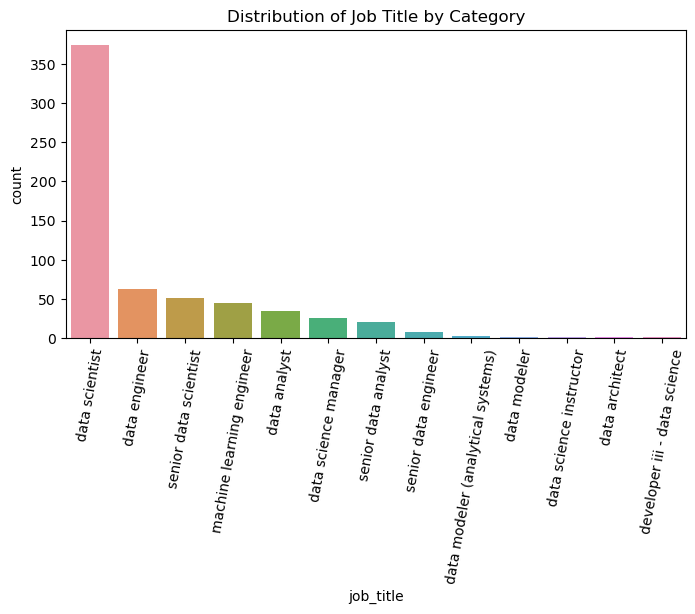

In [112]:
fig,ax=plt.subplots(figsize=(8,4))

sns.countplot(x='job_title',data=df,order=df['job_title'].value_counts().index)
plt.title('Distribution of Job Title by Category')
plt.xticks(rotation=80)

plt.show()

In [113]:
# we can show the average salary midpoint as well as the average salary limits for eash job title

g=df.groupby(['job_title'])


In [114]:
group=df.loc[:,['job_title','salary_lower','salary','salary_upper']].groupby('job_title',as_index=False)

salary_info=group.agg(np.mean).round(1).sort_values(by='salary').reset_index(drop=True)

long_salary_info=salary_info.melt(id_vars=['job_title'],
                                 var_name='type',
                                 value_name='value')

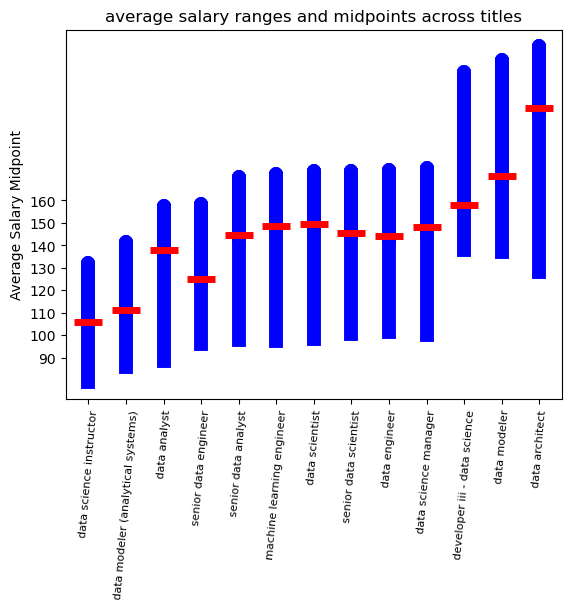

In [115]:
fig,ax=plt.subplots()

for title in salary_info['job_title'].unique():
    current_title=long_salary_info[long_salary_info['job_title']==title]
    plt.plot('job_title','value',data=current_title,lw=10,color='blue')
    plt.plot(title,np.median(current_title['value']),
            color='red',marker='_',ms=20,mew=5)
plt.xticks(rotation = 85, size = 8)
ax.set_title('average salary ranges and midpoints across titles')
ax.set_ylabel('Average Salary Midpoint')
ax.set_yticks(range(90, 170, 10))

plt.show()

In the displayed graph above, we represent the salary range for each job title, with the salary midpoint highlighted in red. And we can notice some interesting things: 
* The Data Analyst position has a notably lower salary range and midpoint compared with other general titles.

* The salary midpoint for the Senior Data Engineer position is lower than that of the Data Engineer. And The salary midpoint and range for the Senior Data Scientist position is really close to that of the Data Scientist. These seem counterintuitive given the usual expectations for senior roles to command higher salaries, as what is shown between the senior data analyst and data analyst. 
     First possible reason is that the sample sizes of these senior positions are too small, as there are only 7 pieces of salary data for the senior data engineer. Secondly, Glassdoor provides salary estimates as ranges, and without insight into the distribution within these ranges, we are not able to access the true salary dynamics.
                                   
* The salary midpoint and range for the Data Manager position stand out as they are noticeably higher compared to the other seven titles.

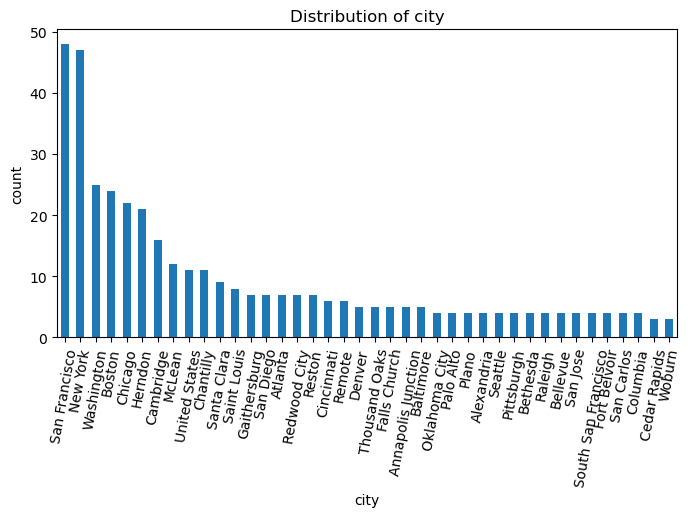

In [117]:
fig,ax=plt.subplots(figsize=(8,4))

# sns.countplot(x='city',data=df,order=df['city'].value_counts().index)

df['city'].value_counts().head(40).plot(kind='bar')
plt.title('Distribution of city')
plt.ylabel('count')
plt.xticks(rotation=80)


plt.show()

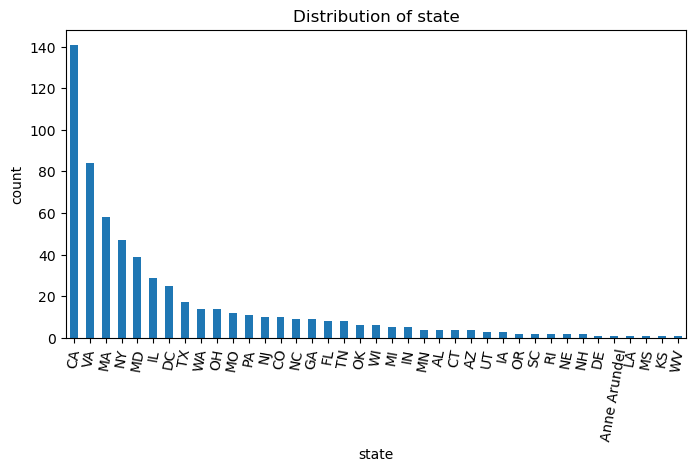

In [118]:
fig,ax=plt.subplots(figsize=(8,4))

# sns.countplot(x='city',data=df,order=df['city'].value_counts().index)

df['state'].value_counts().head(40).plot(kind='bar')
plt.title('Distribution of state')
plt.ylabel('count')
plt.xticks(rotation=80)


plt.show()

<Axes: xlabel='rating', ylabel='Count'>

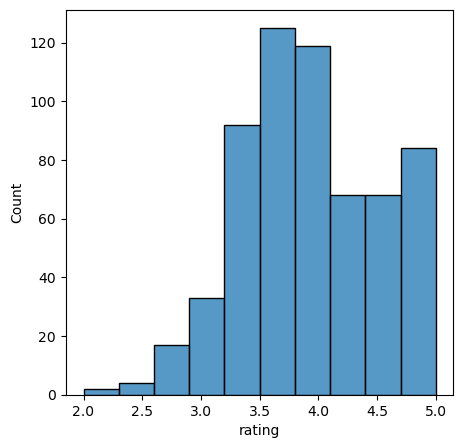

In [119]:
fig,ax=plt.subplots(figsize=(5,5))
sns.histplot(df['rating'],bins=10)

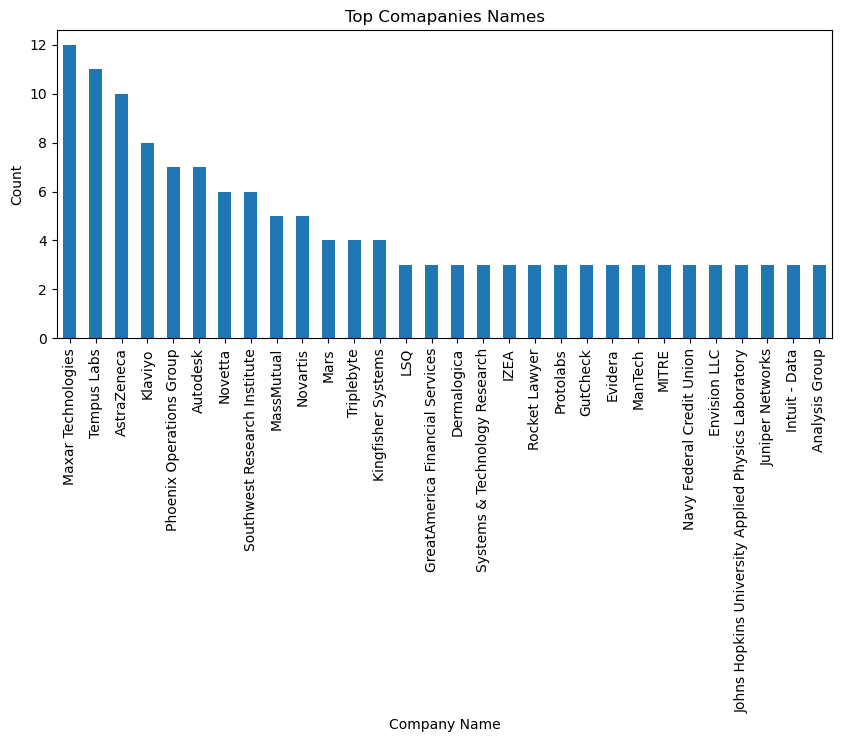

In [120]:
plt.figure(figsize=(10,4))
df['company_name'].value_counts().head(30).plot(kind='bar')
plt.title("Top Comapanies Names")
plt.xlabel("Company Name")
plt.ylabel("Count")
plt.show()

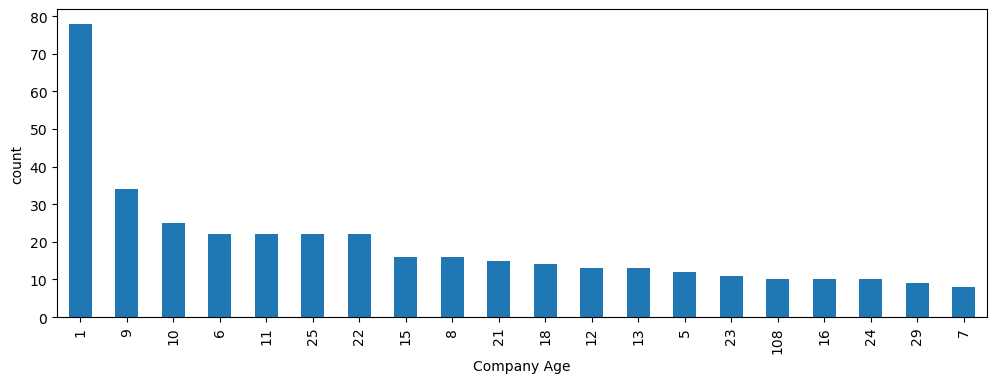

In [123]:
plt.figure(figsize=(12,4))
df['company_age'].value_counts().head(20).plot(kind='bar')
plt.xlabel("Company Age")
plt.ylabel("count")
plt.show()

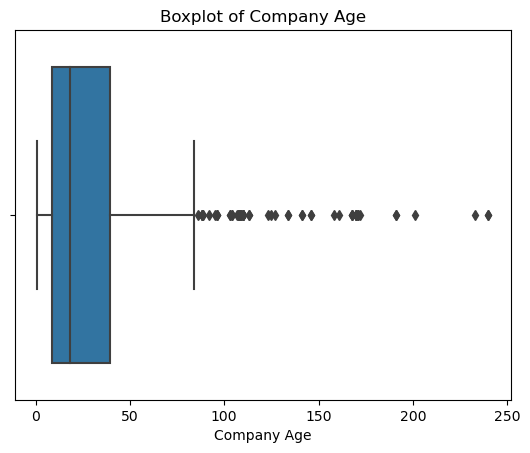

In [125]:
plt.title("Boxplot of Company Age")
sns.boxplot(x=df["company_age"])
plt.xlabel("Company Age")
plt.show()

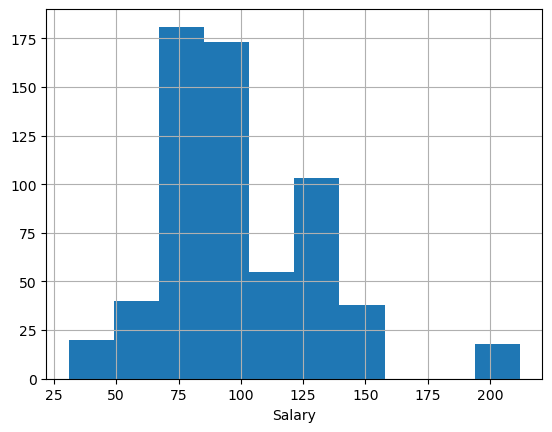

In [126]:
df.salary_lower.hist()
plt.xlabel("Salary")
plt.show()

#### Average salary in the City

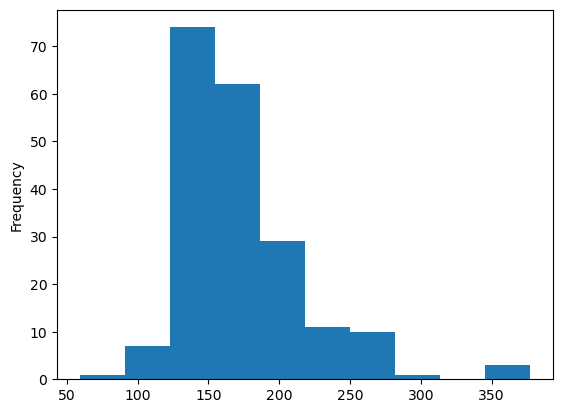

In [128]:
figure=plt.figsize=(20,5)
g=df.groupby('city')['salary'].mean()
g.plot(kind='hist')
plt.show()

In [129]:
ds=round(df[df['job_title']=='data scientist']['salary'].mean(),2)
de=round(df[df['job_title']=='data engineer']['salary'].mean(),2)
sr_ds=round(df[df['job_title']=='senior data scientist']['salary'].mean(),2)
ml=round(df[df['job_title']=='machine learning engineer']['salary'].mean(),2)
da=round(df[df['job_title']=='data analyst']['salary'].mean(),2)
sr_da=round(df[df['job_title']=='senior data analyst']['salary'].mean(),2)

In [130]:
print("data scientist Mean",ds)
print("data engineer Mean",de)
print("senior data scientist Mean",sr_ds)
print("machine learning engineer Mean",ml)
print("data analyst Mean",da)
print("senior data analyst Mean",sr_da)

data scientist Mean 173.18
data engineer Mean 173.46
senior data scientist Mean 173.29
machine learning engineer Mean 171.81
data analyst Mean 157.43
senior data analyst Mean 170.22


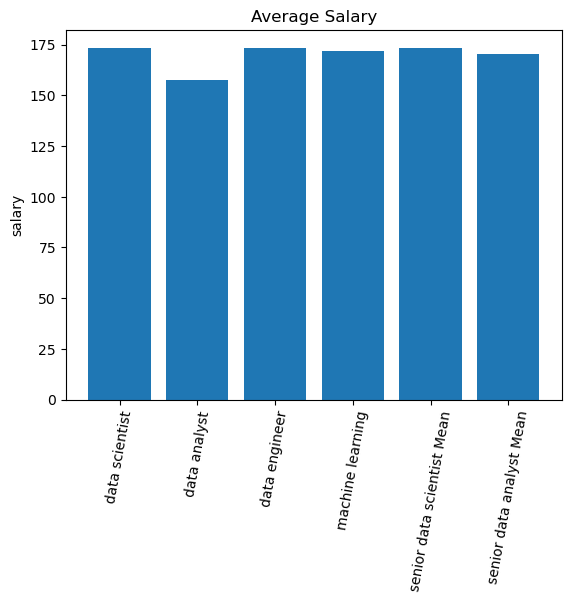

In [133]:
label=["data scientist","data analyst","data engineer","machine learning","senior data scientist Mean","senior data analyst Mean"]

y=[ds,da,de,ml,sr_ds,sr_da]
plt.title("Average Salary")
plt.bar(label,y)
plt.xticks(rotation=80)
plt.ylabel("salary")
plt.show()

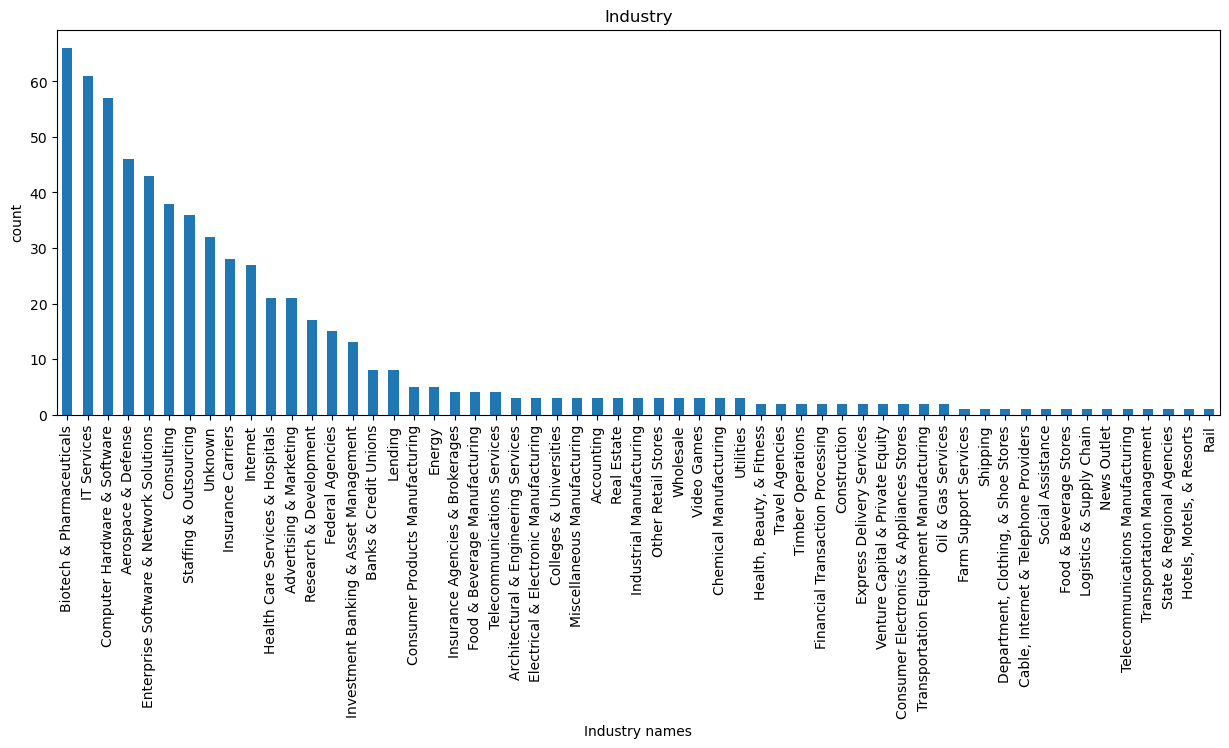

In [136]:
plt.figure(figsize=(15,5))
df['industry'].value_counts().plot(kind='bar')
plt.title("Industry")
plt.xlabel("Industry names")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()


In [137]:
df1=df[(df['python']==1) & ((df['numpy']==1) |(df['pandas']==1))  & (df['power_bi']) | (df['tableau'])]

In [138]:
df2=df1[df1['job_title'] == 'data analyst'][['company_name','salary']].reset_index()

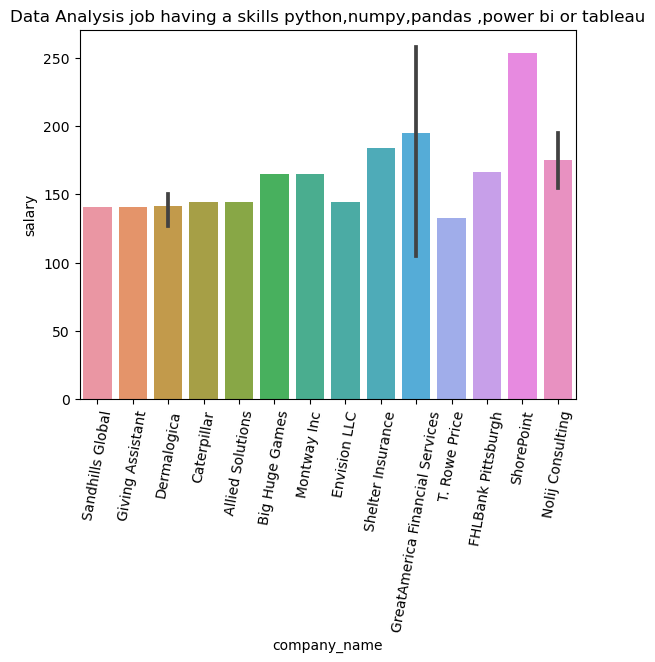

In [139]:
sns.barplot(x='company_name', y='salary',data=df2)
plt.title("Data Analysis job having a skills python,numpy,pandas ,power bi or tableau")
plt.xticks(rotation=80)
plt.show()

##### Observation:
    In Data analysis job creat America finacial services , FHL Bank , shelter insurance,big huge games are the top companies with high amount of salary paid
    

In [140]:
df[(df['python']==1) & ((df['numpy']==1) |(df['pandas']==1))  & (df['power_bi']) | (df['tableau'])]

,job_title,rating,company_name,industry,old_title,salary_lower,salary_upper,salary,city,state,...,spark,aws,tableau,big_data,numpy,pandas,machine_learning,power_bi,sql,deep_learning
13,data modeler,3.1,Old World Industries,Chemical Manufacturing,Data Modeler,137,171,222.5,Northbrook,IL,...,0,0,1,0,0,0,0,0,1,0
15,senior data scientist,4.4,Guzman & Griffin Technologies (GGTI),Federal Agencies,Experienced Data Scientist,137,171,222.5,Washington,DC,...,1,0,1,0,1,0,1,0,1,1
26,data scientist,4.2,LSQ,Investment Banking & Asset Management,Data Scientist - Risk,137,171,222.5,Orlando,FL,...,1,1,1,0,0,0,0,1,0,0
28,data scientist,4.5,Kingfisher Systems,Federal Agencies,Data Scientist,137,171,222.5,McLean,VA,...,0,0,1,0,0,0,1,0,1,0
36,data analyst,2.7,Sandhills Global,Enterprise Software & Network Solutions,Business Intelligence Analyst,75,131,140.5,Lincoln,NE,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,data scientist,3.5,Maxar Technologies,Aerospace & Defense,Data Scientist,92,155,169.5,Herndon,VA,...,1,0,1,0,0,0,1,0,1,1
633,data scientist,4.0,Comtech Global Inc,"Health, Beauty, & Fitness",Data Scientist,105,167,188.5,Washington,DC,...,1,1,1,0,0,0,1,1,1,0
636,data scientist,3.6,Qurate Retail Group,Other Retail Stores,Data Scientist,105,167,188.5,West Chester,PA,...,0,0,1,0,0,0,0,0,1,0
642,data scientist,3.6,TRANZACT,Advertising & Marketing,Data Scientist,105,167,188.5,Fort Lee,NJ,...,0,0,1,0,0,0,1,1,1,0


##### If  you are looking for an data science role in city you will have probality of getting a job ?

In [141]:
df2=df[df['job_title']=="data scientist"]

In [142]:
data_science_jobs=df2.groupby('job_title')[['city','state','salary']].value_counts().reset_index(name='city_counts').head(20)

In [143]:
data_science_jobs

,job_title,city,state,salary,city_counts
0,data scientist,San Francisco,CA,140.5,4
1,data scientist,Washington,DC,377.5,4
2,data scientist,New York,NY,253.5,3
3,data scientist,Washington,DC,122.0,3
4,data scientist,San Francisco,CA,152.5,3
5,data scientist,New York,NY,257.5,3
6,data scientist,Boston,MA,140.5,2
7,data scientist,Gaithersburg,MD,144.5,2
8,data scientist,San Francisco,CA,152.0,2
9,data scientist,New York,NY,165.0,2


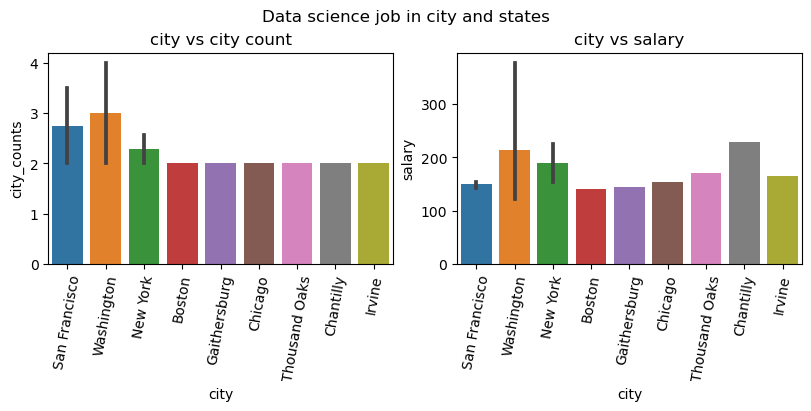

In [144]:
fig,ax=plt.subplots(1,2,figsize=(8,4),constrained_layout=True)
fig.suptitle('Data science job in city and states')
sns.barplot(x='city',y='city_counts',data=data_science_jobs,ax=ax[0])


# sns.barplot(x='city', y='location', stacked=True, data=data_science_jobs, ax=ax[1], palette='viridis')
sns.barplot(x='city',y='salary',data=data_science_jobs,ax=ax[1])

ax[0].set_title('city vs city count')
ax[1].set_title('city vs salary')

ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=80)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=80)

plt.show()

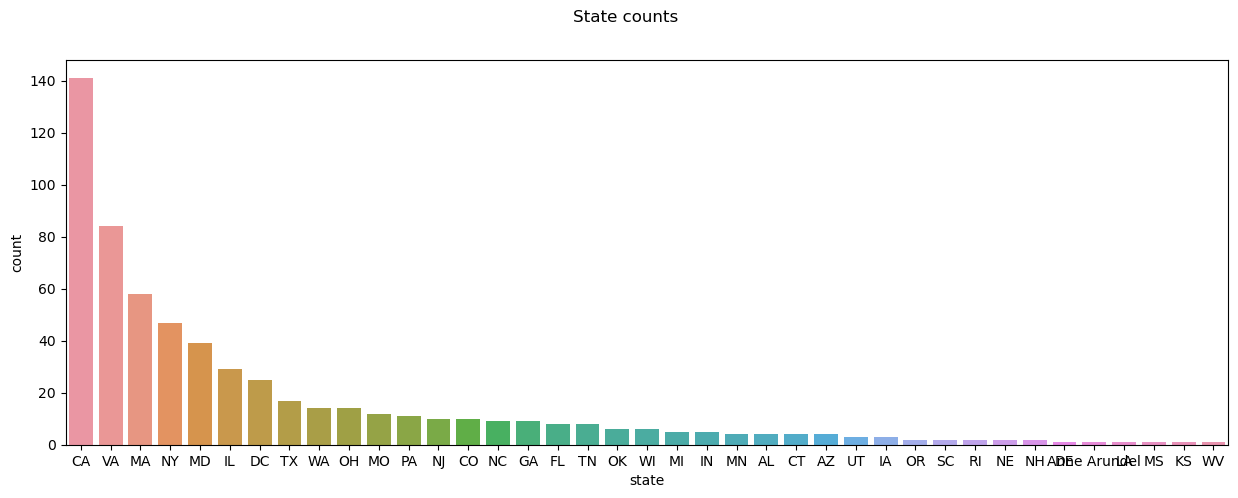

In [145]:
fig,ax=plt.subplots(figsize=(15,5))
sns.countplot(x='state',data=df,order=df['state'].value_counts().index)
plt.suptitle('State counts ')
plt.show()

In [146]:
df2=df[df['job_title']=="data analyst"]
data_analyst_jobs=df2.groupby('job_title')[['city','state','salary']].value_counts().reset_index(name='city_counts').head(20)
print(data_analyst_jobs)

       job_title           city state  salary  city_counts
0   data analyst       Appleton    WI   222.5            1
1   data analyst  San Francisco    CA   140.5            1
2   data analyst    New Orleans    LA   140.5            1
3   data analyst       New York    NY   228.5            1
4   data analyst         Peoria    IL   144.5            1
5   data analyst     Pittsburgh    PA   166.0            1
6   data analyst         Reston    VA   253.5            1
7   data analyst      San Diego    CA   183.5            1
8   data analyst  San Francisco    CA   144.5            1
9   data analyst        Lincoln    NE   140.5            1
10  data analyst     Schaumburg    IL   165.0            1
11  data analyst    Spartanburg    SC   132.0            1
12  data analyst       Timonium    MD   165.0            1
13  data analyst          Tulsa    OK    59.0            1
14  data analyst          Tulsa    OK   132.0            1
15  data analyst     Washington    DC   183.5           

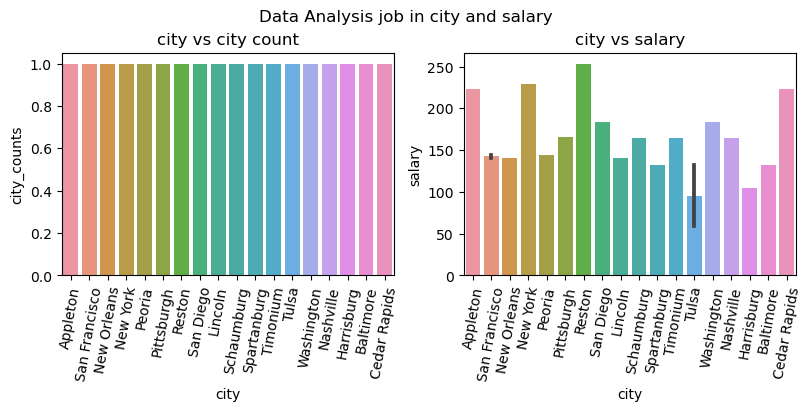

In [147]:
fig,ax=plt.subplots(1,2,figsize=(8,4),constrained_layout=True)
fig.suptitle('Data Analysis job in city and salary')
sns.barplot(x='city',y='city_counts',data=data_analyst_jobs,ax=ax[0])


# sns.barplot(x='city', y='location', stacked=True, data=data_science_jobs, ax=ax[1], palette='viridis')
sns.barplot(x='city',y='salary',data=data_analyst_jobs,ax=ax[1])

ax[0].set_title('city vs city count')
ax[1].set_title('city vs salary')

ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=80)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=80)

plt.show()

##### Top industry for jobs

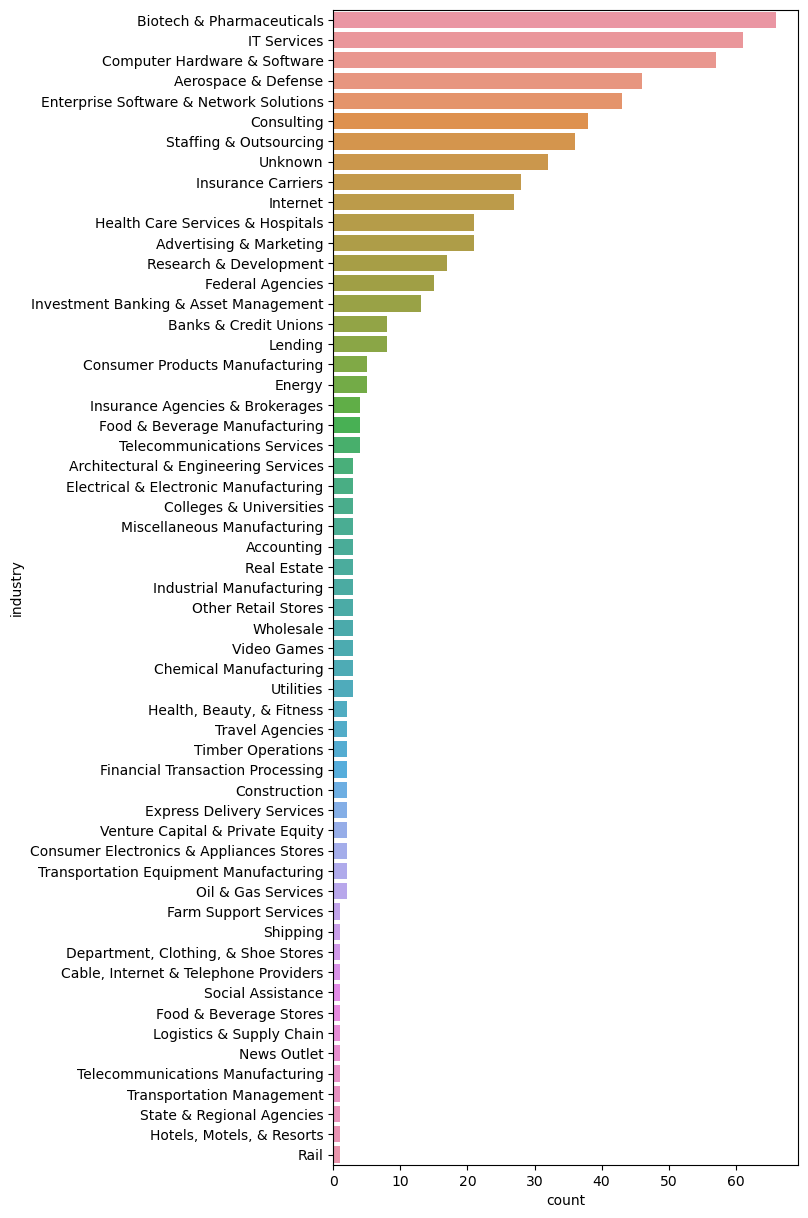

In [148]:

fig, ax = plt.subplots(nrows=1, ncols= 1, figsize=(6,15))
sns.countplot(y='industry',data=df, order= df['industry'].value_counts().index);

##### If  you are looking for an data science role the what type of skills you should  have ?

In [149]:
df2=df[df['job_title']=="data scientist"]

In [150]:
data_science_jobs=df2.groupby('job_title')[['city','state','salary']].value_counts().reset_index(name='city_counts').head(20)

In [151]:
result =df[['python', 'numpy', 'pandas', 'sql']].isin([1]).any(axis=1)


0      False
1       True
2       True
3       True
4       True
       ...  
640     True
641     True
642     True
643     True
644     True
Length: 628, dtype: bool

In [153]:
df2=pd.pivot_table(df,index=['job_title'],values='salary').sort_values('salary',ascending=False).reset_index()

In [154]:
df2

,job_title,salary
0,data architect,228.500000
1,data modeler,222.500000
2,developer iii - data science,217.000000
3,data science manager,174.192308
4,data engineer,173.460317
5,senior data scientist,173.294118
6,data scientist,173.182667
7,machine learning engineer,171.806818
8,senior data analyst,170.225000
9,senior data engineer,158.571429


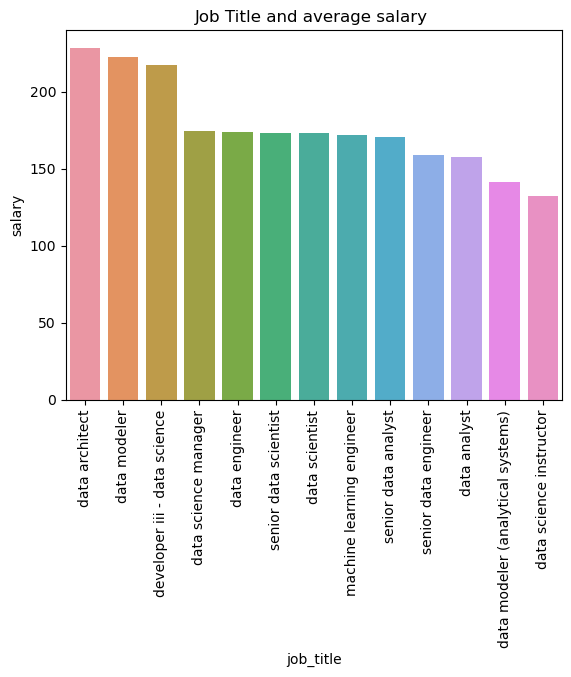

In [155]:
sns.barplot(x='job_title', y='salary',data=df2)
plt.title("Job Title and average salary ")
plt.xticks(rotation=90)
plt.show()

##### What is the age of company?

In [156]:
company=pd.pivot_table(df,index=['company_name'],values='company_age').sort_values('company_age',ascending=False).head(30).reset_index()

In [158]:
company

,company_name,company_age
0,Takeda,240.0
1,State of Virginia,233.0
2,US Pharmacopeia,201.0
3,GSK,191.0
4,Pfizer,172.0
5,BWX Technologies,171.0
6,MassMutual,170.0
7,First Health Group,168.0
8,Travelers,168.0
9,Guardian Life,161.0


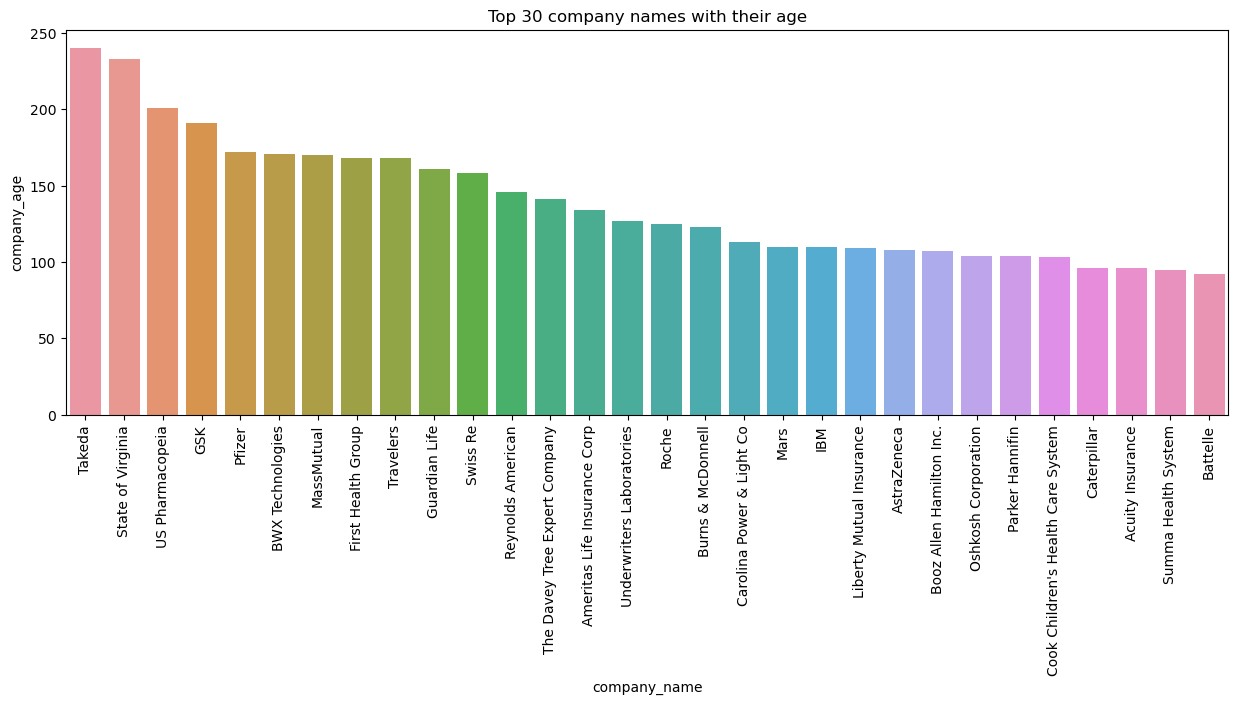

In [157]:
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(x='company_name', y='company_age',data=company)
plt.title("Top 30 company names with their age")
plt.xticks(rotation=90)
plt.show()

#### Relationship between company age and salary


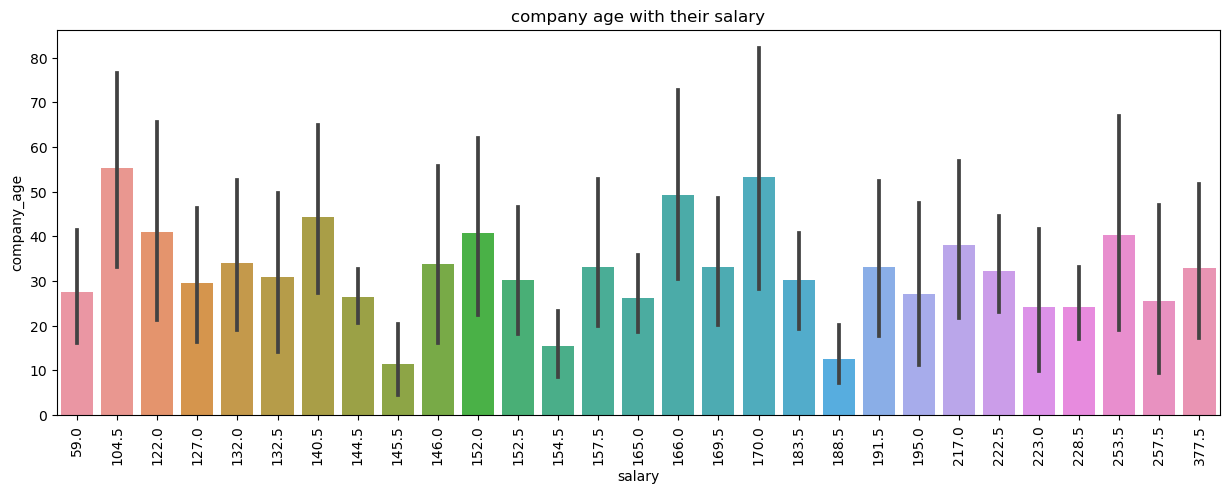

In [160]:
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(x='salary', y='company_age',data=df)
plt.title("company age with their salary")
plt.xticks(rotation=90)
plt.show()

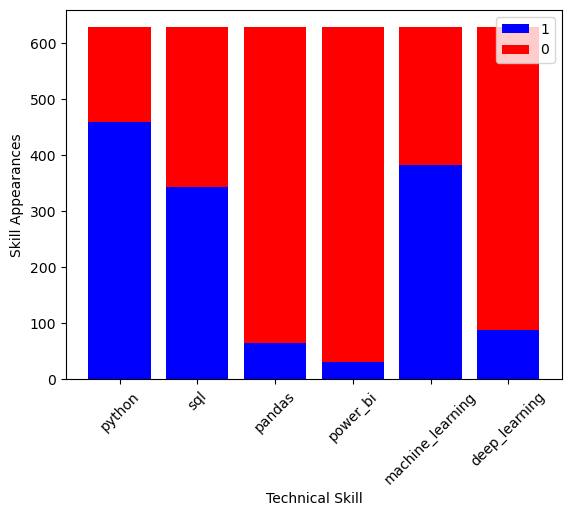

In [161]:

# Create separate Series for occurrences with values 1 and 0
python_1 = df['python'].value_counts().get(1, 0)
sql_1 = df['sql'].value_counts().get(1, 0)
pandas_1 = df['pandas'].value_counts().get(1, 0)
powerbi_1 = df['power_bi'].value_counts().get(1, 0)
machine_learning_1 = df['machine_learning'].value_counts().get(1, 0)
deep_learning_1 = df['deep_learning'].value_counts().get(1, 0)

python_0 = df['python'].value_counts().get(0, 0)
sql_0 = df['sql'].value_counts().get(0, 0)
pandas_0 = df['pandas'].value_counts().get(0, 0)
powerbi_0 = df['power_bi'].value_counts().get(0, 0)
machine_learning_0 = df['machine_learning'].value_counts().get(0, 0)
deep_learning_0 = df['deep_learning'].value_counts().get(0, 0)

# Define x-axis labels
x = ["python", "sql", "pandas", "power_bi", "machine_learning", "deep_learning"]

# Define y-axis values
y1 = [python_1, sql_1, pandas_1, powerbi_1, machine_learning_1, deep_learning_1]
y2 = [python_0, sql_0, pandas_0, powerbi_0, machine_learning_0, deep_learning_0]

# Create a stacked bar plot
plt.bar(x, y1, color='b', label='1')
plt.bar(x, y2, bottom=y1, color='r', label='0')

plt.xlabel("Technical Skill")
plt.xticks(rotation=45)
plt.ylabel("Skill Appearances")
plt.legend()
plt.show()


##### If any one is preparing for data science the they should focus on python and sql skill more as compare to anoter skills

### Creating the WordCloud for Job data

In [162]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

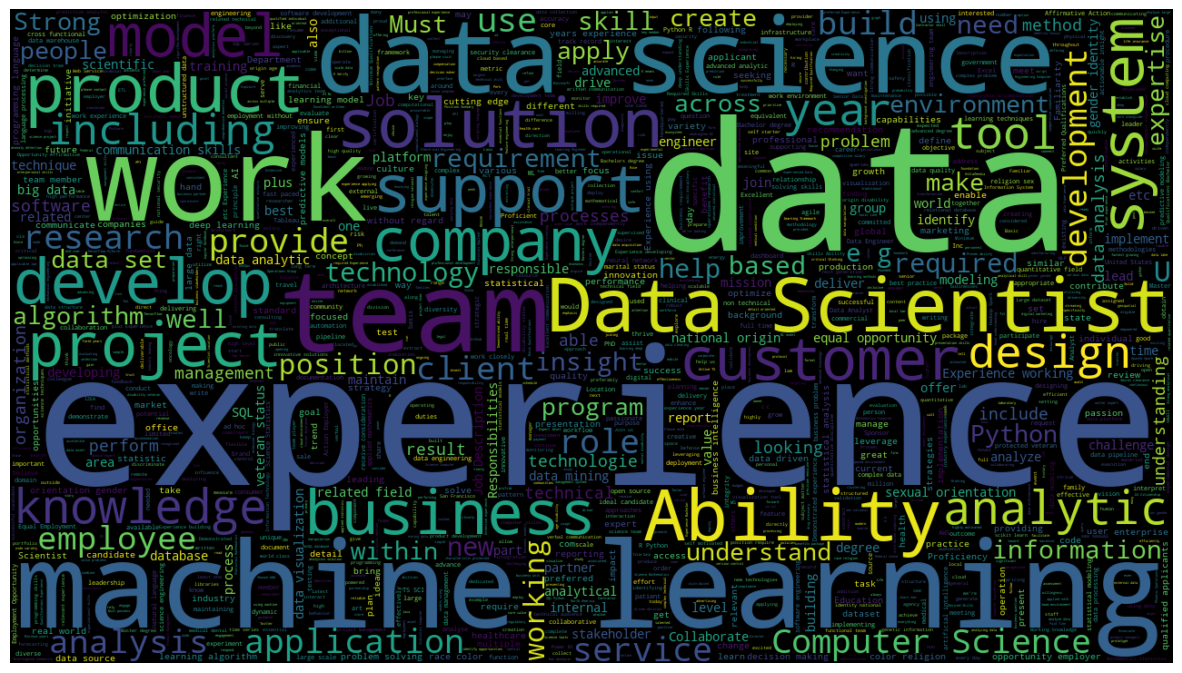

<Figure size 640x480 with 0 Axes>

In [174]:

words = " ".join(data['Job Description'])
wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      max_words=5000, width =1280, height = 720, 
                      background_color="black").generate(words)

plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig('wordcloud.png')

##### Observation: 
    
    Most Frequent Keywords in Job Description:- data,Data Science, learning, experience,machine team,wodk Ability